In [1]:
import numpy as np
from scipy import sparse
import pandas as pd
from preamble import *
%matplotlib inline
from sklearn.model_selection import train_test_split

Using a supervised machine learning model to judge the importance of each feature. The features selection model needs to provide some measure of importance for each feature.
Decision trees and decision tree based model provide a `feature_importances_` attribute, which encodes the importance of each feature. Linear model have coefficients, which can also be interpreted as importance of each feature.

In contrast to univariate selection, model based seletion considers all features at once and thus captures interactions.

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the
# next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)

In [4]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

In [5]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


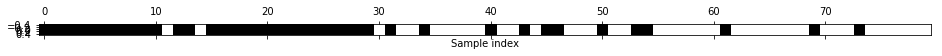

In [6]:
mask = select.get_support()
# visualize the mask -- black is True, whie is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [9]:
from sklearn.linear_model import LogisticRegression
# run with the original values
score = LogisticRegression().fit(
    X_train, y_train).score(X_test, y_test)
print("Test score original data: {:.3f}".format(score))
# Using only the selected features
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(
    X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score selected features: {:.3f}".format(score))

Test score original data: 0.930
Test score selected features: 0.951
